In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import json, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
with open("../results/rate_constraints/ipums-small/trials/results.json", 'r') as in_file:
    results = json.load(in_file)

In [49]:
active_constraint_set = list(results.keys())
print("Protected group counts: ", active_constraint_set)

Protected group counts:  ['0', '6', '12', '19', '25', '32']


In [8]:
def compute_score_mean(d):
    # compute mean of violations
    return np.mean(np.array(list(d.values()))*100)

def compute_score_median(d):
    # compute mean of violations
    return np.median(np.array(list(d.values()))*100)

def compute_score_max(d):
    # compute mean of violations
    return np.max(np.array(list(d.values()))*100)

def compute_score_std(d):
    # compute mean of violations
    return np.std(np.array(list(d.values()))*100)

In [50]:
def get_scores(results, key, func):
    # model constraint satisfaction
    all_scores = []
    constraint_set = active_constraint_set
    print(constraint_set)
    for num_constraints in constraint_set:
        trials = results[num_constraints]
        trial_scores = []
        for trial_num in trials.keys():
            score = func(trials[trial_num][key])
            trial_scores.append(score)
        all_scores.append(trial_scores)
        
    min_scores = []
    mean_scores = []
    max_scores = []
    baseline = 0
    for i in range(len(all_scores)):
        if i == 0:
            baseline = all_scores[0]
            continue
        min_scores.append(min(all_scores[i]))
        mean_scores.append(np.mean(all_scores[i]))
        max_scores.append(max(all_scores[i]))
    min_scores = np.array(min_scores)
    mean_scores = np.array(mean_scores)
    max_scores = np.array(max_scores)
    return min_scores, mean_scores, max_scores, baseline

In [39]:
def get_performance(results, key, func):
    # model performance (accuracy/tpr)
    all_scores = []
    constraint_set = active_constraint_set
    for num_constraints in constraint_set:
        trials = results[num_constraints]
        trial_scores = []
        for trial_num in trials.keys():
            score = trials[trial_num]['scores'][key]*100
            trial_scores.append(score)
        all_scores.append(trial_scores)
    min_scores = []
    mean_scores = []
    max_scores = []
    baseline = 0
    for i in range(len(all_scores)):
        if i == 0:
            baseline = all_scores[0]
            continue
        min_scores.append(min(all_scores[i]))
        mean_scores.append(np.mean(all_scores[i]))
        max_scores.append(max(all_scores[i]))
    min_scores = np.array(min_scores)
    mean_scores = np.array(mean_scores)
    max_scores = np.array(max_scores)
    return min_scores, mean_scores, max_scores, baseline

# Result 1: Overall constraint satisfaction score 

In [22]:
constraint_ints = [6, 12, 19, 25, 32]

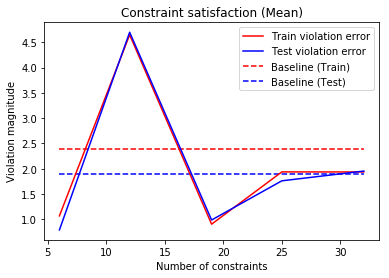

In [25]:
_, train_scores, _, train_baseline = get_scores(results, 'train_violation', compute_score_mean)
_, test_scores, _, test_baseline = get_scores(results, 'test_violation', compute_score_mean)
plt.hlines(y=train_baseline, xmin=6, xmax=32, label="Baseline (Train)", color="red", linestyle='dashed')
plt.plot(constraint_ints, train_scores, label="Train violation error", color="red")

plt.hlines(y=test_baseline, xmin=6, xmax=32, label="Baseline (Test)", color="blue", linestyle='dashed')
plt.plot(constraint_ints, test_scores, label="Test violation error", color="blue")

plt.title("Constraint satisfaction (Mean)")
plt.ylabel("Violation magnitude")
plt.xlabel("Number of constraints")
plt.legend()
plt.show()

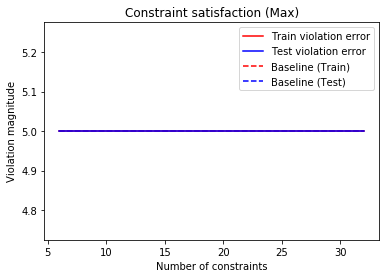

In [26]:
train_lower, train_scores, train_upper, train_baseline = get_scores(results, 'train_violation', compute_score_max)
test_lower, test_scores, test_upper, test_baseline = get_scores(results, 'test_violation', compute_score_max)
plt.hlines(y=train_baseline, xmin=6, xmax=32, label="Baseline (Train)", color="red", linestyle='dashed')
plt.plot(constraint_ints, train_scores, label="Train violation error", color="red")
#plt.fill_between(active_constraint_set, train_upper, train_lower, alpha=0.25, color="red")

plt.hlines(y=test_baseline, xmin=6, xmax=32, label="Baseline (Test)", color="blue", linestyle='dashed')
plt.plot(constraint_ints, test_scores, label="Test violation error", color="blue")
#plt.fill_between(active_constraint_set, test_upper, test_lower, alpha=0.25, color="blue")

plt.title("Constraint satisfaction (Max)")
plt.ylabel("Violation magnitude")
plt.xlabel("Number of constraints")
plt.legend()
plt.show()

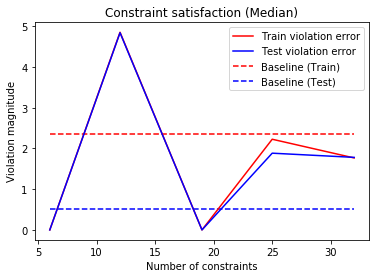

In [31]:
train_lower, train_scores, train_upper, train_baseline = get_scores(results, 'train_violation', compute_score_median)
test_lower, test_scores, test_upper, test_baseline = get_scores(results, 'test_violation', compute_score_median)
plt.hlines(y=train_baseline, xmin=6, xmax=32, label="Baseline (Train)", color="red", linestyle='dashed')
plt.plot(constraint_ints, train_scores, label="Train violation error", color="red")
#plt.fill_between(active_constraint_set, train_upper, train_lower, alpha=0.25, color="red")

plt.hlines(y=test_baseline, xmin=6, xmax=32, label="Baseline (Test)", color="blue", linestyle='dashed')
plt.plot(constraint_ints, test_scores, label="Test violation error", color="blue")
#plt.fill_between(active_constraint_set, test_upper, test_lower, alpha=0.25, color="blue")

plt.title("Constraint satisfaction (Median)")
plt.ylabel("Violation magnitude")
plt.xlabel("Number of constraints")
plt.legend()
plt.show()

['0', '6', '12', '19', '25', '32']
['0', '6', '12', '19', '25', '32']


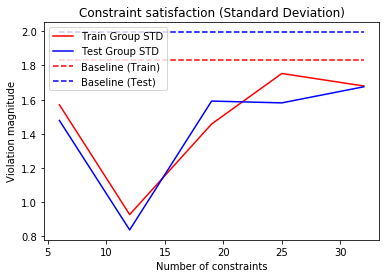

In [55]:
train_lower, train_scores, train_upper, train_baseline = get_scores(results, 'train_violation', compute_score_std)
test_lower, test_scores, test_upper, test_baseline = get_scores(results, 'test_violation', compute_score_std)

plt.hlines(y=train_baseline, xmin=6, xmax=32, label="Baseline (Train)", color="red", linestyle='dashed')
plt.plot(constraint_ints, train_scores, label="Train Group STD", color="red")
#plt.fill_between(active_constraint_set, train_upper, train_lower, alpha=0.25, color="red")

plt.hlines(y=test_baseline, xmin=6, xmax=32, label="Baseline (Test)", color="blue", linestyle='dashed')
plt.plot(constraint_ints, test_scores, label="Test Group STD", color="blue")
#plt.fill_between(active_constraint_set, test_upper, test_lower, alpha=0.25, color="blue")

plt.title("Constraint satisfaction (Standard Deviation)")
plt.ylabel("Violation magnitude")
plt.xlabel("Number of constraints")
plt.legend()
plt.show()

## Accuracy 

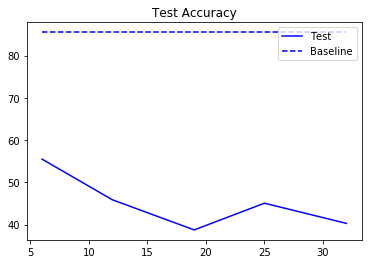

In [33]:
test_lower, test_scores, test_upper, test_baseline = get_performance(results, 'accuracy', None)


plt.hlines(y=test_baseline, xmin=6, xmax=32, label="Baseline", color="blue", linestyle='dashed')
plt.plot(constraint_ints, test_scores, label="Test", color="blue")
#plt.fill_between(active_constraint_set, test_upper, test_lower, alpha=0.25, color="blue")

plt.title("Test Accuracy")
plt.legend()
plt.show()

## TPR

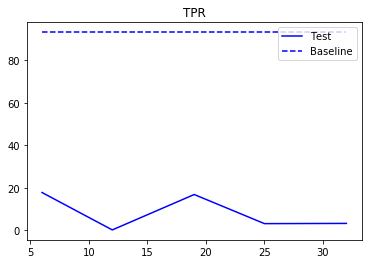

In [34]:
test_lower, test_scores, test_upper, test_baseline = get_performance(results, 'tpr', None)
active_constraint_set = [1, 5, 10, 15, 22]

plt.hlines(y=test_baseline, xmin=6, xmax=32, label="Baseline", color="blue", linestyle='dashed')
plt.plot(constraint_ints, test_scores, label="Test", color="blue")
#plt.fill_between(active_constraint_set, test_upper, test_lower, alpha=0.25, color="blue")

plt.title("TPR")
plt.legend()
plt.show()

## Group-wise performance variance

['0', '6', '12', '19', '25', '32']
['0', '6', '12', '19', '25', '32']


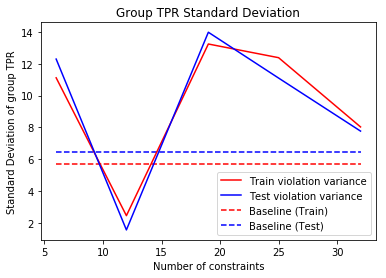

In [51]:
train_lower, train_scores, train_upper, train_baseline = get_scores(results, 'train_rates', compute_score_std)
test_lower, test_scores, test_upper, test_baseline = get_scores(results, 'test_rates', compute_score_std)

plt.hlines(y=train_baseline, xmin=6, xmax=32, label="Baseline (Train)", color="red", linestyle='dashed')
plt.plot(constraint_ints, train_scores, label="Train violation variance", color="red")
#plt.fill_between(active_constraint_set, train_upper, train_lower, alpha=0.25, color="red")

plt.hlines(y=test_baseline, xmin=6, xmax=32, label="Baseline (Test)", color="blue", linestyle='dashed')
plt.plot(constraint_ints, test_scores, label="Test violation variance", color="blue")
#plt.fill_between(active_constraint_set, test_upper, test_lower, alpha=0.25, color="blue")

plt.title("Group TPR Standard Deviation")
plt.ylabel("Standard Deviation of group TPR")
plt.xlabel("Number of constraints")
plt.legend()
plt.show()

In [54]:
results['6']['0']

{'active_constraints': ['age_0',
  'race_Pakistani',
  'race_Korean',
  'race_Vietnamese',
  'gender_Male',
  'age_5'],
 'scores': {'accuracy': 0.555, 'tpr': 0.17752199139060454},
 'test_rates': {'INCOME_LABEL': 0.17752199139060454,
  'age_0': 0.0,
  'age_1': 0.0,
  'age_2': 0.1950509461426492,
  'age_3': 0.3534675615212528,
  'age_4': 0.38832315003394435,
  'age_5': 0.24768375540457072,
  'age_6': 0.20213577421815407,
  'age_7': 0.06921944035346098,
  'age_8': 0.018018018018018018,
  'age_9': 0.0,
  'gender_Female': 0.126550346857263,
  'gender_Male': 0.21841794569067297,
  'race_Asian Indian (Hindu 1920_1940)': 0.3,
  'race_Black/African American/Negro': 0.13812154696132597,
  'race_Cherokee': 0.18181818181818182,
  'race_Chinese': 0.05303030303030303,
  'race_Filipino': 0.28431372549019607,
  'race_Japanese': 0.3333333333333333,
  'race_Korean': 0.3333333333333333,
  'race_Navajo': 0.11764705882352941,
  'race_Other Asian, n.e.c.': 0.09090909090909091,
  'race_Other race, n.e.c.': 0